# This project will use machine learning techniques to perform loan approvals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset 1
bank_loan_applications = pd.read_csv("../datasets/1. bank_loan_applications/application_data.csv")
bank_loan_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
bank_loan_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
list(bank_loan_applications.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
# import dataset 2
bank_loan_dataset = pd.read_csv("../datasets/2. bank_loans_dataset/application_data.csv")
bank_loan_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
bank_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
list(bank_loan_dataset.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

* dataset 1 and 2 have almost the same information

# `Business Loan Dataset`:

will try to use this dataset using the following framework:
- Group/segment business loans only from the dataset
- Clean and preprocess dataset
- Perform EDA on the Dataset
- Assign and synthesize industries
- Develop an algorithm to make decision based on Industry Performance, might use "NAICS codes"
- Train and test the model
- Iterate test and train by tuning params
- Evaluate model
- Deploy model in django

In [2]:
# import dataset 3
loan_approval_dataset = pd.read_csv("../datasets/3.loan_approval_dataset/Loan.csv")
loan_approval_dataset.head()

,Unnamed: 0,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,...,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1,high_interest_rate,senior_age
0,126324,151214,2019,ncf,Male,nopre,type1,p3,l1,nopc,...,EXP,35-44,to_inst,70.063920,North,direct,0,42.0,1,0
1,13385,38275,2019,cf,Joint,nopre,type1,p4,l1,nopc,...,EXP,>74,not_inst,40.327381,North,direct,0,40.0,0,1
2,98606,123496,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,CIB,55-64,to_inst,49.260355,south,direct,0,29.0,1,1
3,7184,32074,2019,cf,Female,nopre,type1,p3,l1,nopc,...,CIB,35-44,to_inst,74.280576,North,direct,0,44.0,1,0
4,120745,145635,2019,cf,Male,nopre,type1,p1,l1,nopc,...,CIB,35-44,not_inst,99.107143,North,direct,0,42.0,0,0


In [3]:
loan_approval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11

In [4]:
list(loan_approval_dataset.columns)

['Unnamed: 0',
 'id',
 'year',
 'loan_limit',
 'gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'credit_worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'secured_by',
 'total_units',
 'income',
 'credit_type',
 'credit_score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'ltv',
 'region',
 'security_type',
 'status',
 'dtir1',
 'high_interest_rate',
 'senior_age']

In [6]:
loan_approval_dataset.shape

(148670, 37)

In [4]:
loan_approval_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,148660,148661,148662,148663,148664,148665,148666,148667,148668,148669
Unnamed: 0,126324,13385,98606,7184,120745,142430,37242,58546,18909,89548,...,16230,64794,63950,19911,12409,82796,25109,136462,116343,83945
id,151214,38275,123496,32074,145635,167320,62132,83436,43799,114438,...,41120,89684,88840,44801,37299,107686,49999,161352,141233,108835
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
loan_limit,ncf,cf,cf,cf,cf,ncf,cf,cf,cf,cf,...,cf,ncf,ncf,NaN,cf,cf,cf,cf,cf,cf
gender,Male,Joint,Sex Not Available,Female,Male,Male,Male,Female,Female,Joint,...,Joint,Sex Not Available,Joint,Sex Not Available,Female,Male,Male,Male,Male,Female
approv_in_adv,nopre,nopre,nopre,nopre,nopre,pre,nopre,pre,nopre,nopre,...,nopre,nopre,pre,pre,pre,nopre,nopre,nopre,pre,pre
loan_type,type1,type1,type1,type1,type1,type2,type1,type1,type1,type1,...,type2,type1,type1,type2,type2,type1,type2,type1,type1,type1
loan_purpose,p3,p4,p3,p3,p1,p3,p1,p1,p3,p4,...,p1,p3,p3,p1,p3,p1,p3,p3,NaN,p1
credit_worthiness,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,...,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
open_credit,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,...,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc


### dataset description

description from kaggle:

Y: status

- status = 0: approved
- status = 1: denied

X:
- id: Loan applicant ID
- loan_amount: Loan Amount
- gender: Gender of Loan Applicant
- age: Age of Loan Applicant
- income: Annual Income of Loan Applicant
- region: Region of Loan Applicant
- approv_in_adv: Whether the Loan has been Approved in Advance
- loan_type: Type of Loan
- loan_purpose: Purpose of Loan
- business_or_commercial: Business Loan or Commercial Loan
- rate_of_interest: Loan Interest Rate (If approved. NaN if the loan is not approved)
- credit_score: Applicant's Credit Score



additional column descriptions:

1. "Unnamed:0" : "Unknown"
2. "id": "row id",
3. "year": "year of application",
4. "loan_limit": "`limit of each loan`:, with ncf -> `Not Consumed Fully`, cf -> `Consumed FUlly`",
6. "gender": "Male, Female, Joint, Not provided",
7. "approv_in_adv": "`approve in advance`: nopre->`not pre-approved`", "pre->`pre approved`",
8. "loan_type": "type of loan",
9. 'loan_purpose': "loan purpose",
10. 'credit_worthiness': "`credit worthness`: is the applicant worth to get the loan",
11. 'open_credit': "`open credit`: allows applicant access credit repeatedly up to a specific maximum limit",
12. 'business_or_commercial': "is it a `business or commercial loan`",
13. 'loan_amount': "loan amount",
14. 'rate_of_interest': "interest rate of loan",
15. 'interest_rate_spread': "interest rate speed",
16. 'upfront_charges': " `upfront fee`:a common fee charged by lenders when you apply for a loan, often called an 'establishment', is for costs of processing a loan",
17. 'term': "term of loan",
18. 'neg_ammortization': " `Negative amortization`: means that even when you pay, the amount you owe will still go up because you are not paying enough to cover the interest.",
19. 'interest_only': " `interest only`: a loan in which the borrower pays only the interest for some or all of the term",
20. 'lump_sum_payment': "`lumpsum payment`: a large sum that is paid in one single payment instead of installments.",
21. 'property_value': "property value",
22. 'construction_type': "construction type",
23. 'occupancy_type': "ocupancy type",
24. 'secured_by': "secured by",
25. 'total_units': "total units of the property,
26. 'income': "applicant's income p/m whether business or personal",
27. 'credit_type': "credit type",
28. 'credit_score': "credit score",
29. 'co-applicant_credit_type': "co applicant's `credit type`,
30. 'age': "age of applicant",
31. 'submission_of_application': ,
32. 'ltv': "`Investment to Value`: the percentage of the investment amount compared to the value of the property",
33. 'region': "region",
34. 'security_type': "`security type`: ",
35. 'status': "status",
36. 'dtir1': "`Debt to Income ratio`:  all your monthly debt payments divided by your gross monthly income",
37. 'high_interest_rate': "`high interest rate`: 1 = True, 0 = False,
38. 'senior_age': "`senior age`: is senior age group or not"]


## 1. Extract business or corporate loans only 

- the reason for doing this is to only deal with commercial loans and exclude personal or individual loans
- commercial loans are a perfect suit for this project's use case
- it's easy to scrape information from the internet that aligns with commercial loans
- there is vast information that might align with commercial loans than individual loans
  

### check uniques values for business or commercial loan

In [7]:
# check the available options 
loan_approval_dataset["business_or_commercial"].unique()

array(['nob/c', 'b/c'], dtype=object)

there are two options for this column:

- b/c meaning `business or commercial` loan
- nob/c meaning `not business or commercial`

### export business or commercial loans to a different dataset

In [ ]:
business_loans_df = lo

# loan_approval_dataset.transpose()

* this data set has promising labels that are feasible to use

In [11]:
# import dataset 4
loan_dataset = pd.read_csv("../datasets/4.loan_dataset/loan_data_2017.csv")
loan_dataset.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_14900\1846523296.py:2: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataset = pd.read_csv("../datasets/4.loan_dataset/loan_data_2017.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,60 months,19.53%,262.34,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000.0,35000.0,35000.0,60 months,20.75%,941.96,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,60 months,9.16%,416.73,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17475.0,17475.0,17475.0,60 months,11.47%,384.06,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000.0,8000.0,8000.0,36 months,9.16%,255.00,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133889 entries, 0 to 133888
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 148.1+ MB


In [13]:
list(loan_dataset.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [21]:
loan_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,133879,133880,133881,133882,133883,133884,133885,133886,133887,133888
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 2087217200,Total amount funded in policy code 2: 662815446
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
funded_amnt,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
funded_amnt_inv,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset description



In [14]:
# import dataset number 5

In [15]:
# df = pd.read_excel("../datasets/5.bank dataset/bank-full.xlsx")
# # Write the DataFrame to a CSV file
# df.to_csv("../datasets/5.bank dataset/bank_dataset.csv", index=False)  

# we no longer need to run the above lines since we now have our dataset in csv locally

In [16]:
# we now import the dataset
bank_dataset = pd.read_csv("../datasets/5.bank dataset/bank_dataset.csv")
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# for progress sake i will use the 3rd dataset,

# This is a new dataset i will analyze before training the model

In [3]:
loan_dataset_5 = pd.read_csv("local_dataset.csv")
loan_dataset_5.T

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
Company Name,ABC Holdings,Tech Solutions,ZimMart,Hospitality Inn,BuildZim,Econet Wireless,OK Zimbabwe,Delta Corporation,Seed Co Zimbabwe,Innscor Africa,...,HealthCare Holdings Limited,Medical Investments Limited,City Health Care Partnership (Pvt) Ltd,Cimas Medical Aid Society,Trauma Centre Hospital (Pvt) Limited,City Medical Centre (Pvt) Limited,PSMI Holdings (Pvt) Limited,HealthPlus Medical Services (Pvt) Ltd,HealthGuard Medical Services (Pvt) Ltd,Fidelity Life Medical Aid Society
Business Revenue,"$500,000","$300,000","$700,000","$400,000","$600,000","$1,200,000","$800,000","$1,500,000","$900,000","$1,100,000",...,"$2,200,000","$1,800,000","$1,500,000","$2,500,000","$2,000,000","$1,700,000","$1,600,000","$2,300,000","$2,100,000","$1,900,000"
Profitability,15%,10%,20%,12%,18%,25%,18%,20%,15%,22%,...,27%,24%,22%,29%,26%,23%,25%,28%,26%,24%
Cash Flow,"$50,000","$30,000","$70,000","$40,000","$60,000","$120,000","$80,000","$150,000","$90,000","$110,000",...,"$220,000","$180,000","$150,000","$250,000","$200,000","$170,000","$160,000","$230,000","$210,000","$190,000"
Business Age,10 years,5 years,15 years,7 years,12 years,20 years,25 years,40 years,35 years,30 years,...,20 years,18 years,16 years,22 years,19 years,17 years,16 years,21 years,20 years,18 years
Industry Sector,Financial Services,Technology,Retail,Hospitality,Construction,Telecommunications,Retail,Beverages,Agriculture,Food,...,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare
Business Structure,Corporation,Limited Liability Company,Sole Proprietorship,Partnership,Corporation,Corporation,Corporation,Corporation,Corporation,Corporation,...,Corporation,Corporation,Corporation,Non-profit,Corporation,Corporation,Corporation,Corporation,Corporation,Non-profit
Ownership Structure,Founder-owned,Co-founder partnership,Family-owned,Multiple partners,Investor-owned,Founder-owned,Publicly traded,Publicly traded,Publicly traded,Founder-owned,...,Public,Public,Private,Non-profit,Private,Private,Private,Private,Private,Non-profit
Credit History,Good,Limited,Excellent,Moderate,Strong,Excellent,Good,Excellent,Good,Excellent,...,Excellent,Excellent,Good,Excellent,Excellent,Good,Good,Excellent,Excellent,Good
Collateral Value,"$750,000","$400,000","$900,000","$600,000","$1,000,000","$2,000,000","$1,500,000","$3,000,000","$1,200,000","$2,500,000",...,"$3,200,000","$2,800,000","$2,200,000","$4,000,000","$3,000,000","$2,500,000","$2,400,000","$3,500,000","$3,200,000","$2,800,000"


In [3]:
loan_dataset_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenue       112 non-null    object 
 2   Profitability          112 non-null    object 
 3   Cash Flow              112 non-null    object 
 4   Business Age           112 non-null    object 
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value       112 non-null    object 
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Loan Approved          112 non-null    int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 12.4+ KB

In [4]:
loan_dataset_5.describe()

,Debt-to-Equity Ratio,Loan Approved
count,112.000000,112.000000
mean,0.499107,0.982143
std,0.119681,0.133027
min,0.300000,0.000000
25%,0.400000,1.000000
50%,0.500000,1.000000
75%,0.600000,1.000000
max,0.800000,1.000000


In [4]:
# count how many times laons were approved comparing to the size of the dataset
label_counts = loan_dataset_5["Loan Approved"].value_counts()

label_counts
# print("approved: ", label_counts[1])
# print("declined: ", label_counts[0])

Loan Approved
1    110
0      2
Name: count, dtype: int64

# Scrape Industry News to depict trend of each industry 
- this process involves using SERPAI
- will only scrape news headlines from google news targeting Zimbabwean news
- will gather news for each industry and store in separate variables

the process is just simple:
- initialize variables for available industry sector
- store the sectors in an array
- create a function to scrape news from google news
- loop through the array and collect news for each industry
- store collected news for each industry

### Initialize industry variables

In [5]:
industries = loan_dataset_5["Industry Sector"].unique()
industries

array(['Financial Services', 'Technology', 'Retail', 'Hospitality',
       'Construction', 'Telecommunications', 'Beverages', 'Agriculture',
       'Food', 'Manufacturing', 'Food & Beverage', 'Automotive',
       'Pharmaceuticals', 'Logistics', 'Mining', 'Media & Publishing',
       'Investment', 'Export/Import', 'Chemicals', 'Forestry', 'Beverage',
       'Wholesale', 'Hospitality & Tourism', 'Real Estate', 'Energy',
       'Petroleum', 'Renewable Energy', 'Healthcare'], dtype=object)

In [6]:
print(len(industries))

28


In [29]:
# create a dictionary of search texts 

search_texts = {
    'Financial Services': 'financial services news economic outlook in Zimbabwe',
    'Technology': 'technology news innovation trends in Zimbabwe',
    'Retail': 'retail news  in Zimbabwe',
    'Hospitality': 'hospitality news tourism industry updates in Zimbabwe',
    'Construction': 'construction news infrastructure projects updates in Zimbabwe',
    'Telecommunications': 'telecommunications news telecom industry updates in Zimbabwe',
    'Beverages': 'beverages industry news market trends in Zimbabwe',
    'Agriculture': 'agriculture news farming industry updates in Zimbabwe',
    'Food': 'food industry news food production trends in Zimbabwe',
    'Manufacturing': 'manufacturing news industrial sector updates in Zimbabwe',
    'Food & Beverage': 'food and beverage news market analysis in Zimbabwe',
    'Automotive': 'automotive industry news car market trends in Zimbabwe',
    'Pharmaceuticals': 'pharmaceuticals news drug development updates in Zimbabwe',
    'Logistics': 'logistics industry news supply chain updates in Zimbabwe',
    'Mining': 'mining industry news mineral resource updates in Zimbabwe',
    'Media & Publishing': 'media and publishing news journalism updates in Zimbabwe',
    'Investment': 'investment news financial markets analysis in Zimbabwe',
    'Export/Import': 'export import news trade policies analysis in Zimbabwe',
    'Chemicals': 'chemicals industry news chemical production trends in Zimbabwe',
    'Forestry': 'forestry industry news timber market updates in Zimbabwe',
    'Beverage': 'beverage industry news beverage market trends in Zimbabwe',
    'Wholesale': 'wholesale industry news distribution sector updates in Zimbabwe',
    'Hospitality & Tourism': 'hospitality and tourism news travel industry updates in Zimbabwe',
    'Real Estate': 'real estate news property market trends in Zimbabwe',
    'Energy': 'energy industry news power sector updates in Zimbabwe',
    'Petroleum': 'petroleum industry news oil and gas industry updates in Zimbabwe',
    'Renewable Energy': 'renewable energy news clean energy sector updates in Zimbabwe',
    'Healthcare': 'healthcare industry news medical sector updates in Zimbabwe'
}

test search text

In [31]:
test_search_text = {
    'Financial Services': 'financial services news economic outlook in Zimbabwe',
    'Technology': 'technology news or innovation trends in Zimbabwe',
}

### scrape and format obtained news articles

In [47]:
# perform web scraping using serpaAPI on all industries

from decouple import config
from loguru import logger
from serpapi import GoogleSearch # todo enable serpai later

industry_results = {}
news_results = []

for industry, search_text in test_search_text.items():
    # Set up parameters for the Google News search
    params = {
        "engine": "google_news",
        "q": search_text,
        "api_key": config("SERPAI_API_KEY")
    }
    
    # Perform the Google News search
    search = GoogleSearch(params)
    results = search.get_dict()
    
    news_results = results["news_results"]

    """
    # create an array or simple dictionary of with key value pair of news headline, id and date
    # id, title, source (just source name), authors, date_posted
    """

    # format industry news 
    formatted_industry_news = []
    for news_item in news_results:
        formatted_industry_news.append({
            'id': news_item.get('position', 'Unknown Position'),
            'title': news_item.get('title', 'Unknown Title'),
            'news_source': news_item.get('source', {}).get('name', 'Unknown Source'),
            'date_posted': news_item.get('date', 'Unknown Date')
        })
    formatted_industry_news
    
    # Store the news results
    industry_results[industry] = formatted_industry_news
    logger.success(f"successfully obtained news for {industry}")

2024-03-30 16:15:29.162 | SUCCESS  | __main__:<module>:42 - successfully obtained news for Financial Services
2024-03-30 16:15:34.188 | SUCCESS  | __main__:<module>:42 - successfully obtained news for Technology


log the scraped news

In [50]:
industry_results["Technology"]

[{'id': 1,
  'title': 'Global Innovation Index 2023: Innovation in the face of uncertainty',
  'news_source': 'WIPO',
  'date_posted': '09/27/2023, 07:00 AM, +0000 UTC'},
 {'id': 2,
  'title': "Embracing Digital Innovation: Zimbabwe's Growing Interest in Online Platforms |",
  'news_source': 'New Zimbabwe.com',
  'date_posted': '06/30/2023, 07:00 AM, +0000 UTC'},
 {'id': 3,
  'title': 'Zim flag flies high in Italian robotics challenge',
  'news_source': 'The Herald',
  'date_posted': '03/07/2024, 08:00 AM, +0000 UTC'},
 {'id': 4,
  'title': 'Journalism, media, and technology trends and predictions 2023 | Reuters Institute for the Study of Journalism',
  'news_source': 'Reuters Institute',
  'date_posted': '01/10/2023, 08:00 AM, +0000 UTC'},
 {'id': 5,
  'title': 'Econet Wireless Zimbabwe Adopts eSim technology to align with global trend',
  'news_source': 'The Exchange - Investment News in Africa',
  'date_posted': '09/29/2023, 07:00 AM, +0000 UTC'},
 {'id': 6,
  'title': 'New Tech, Ne

# Performing sentiment analysis 

## using textblob

`for now i will use textblob for progress sack, will use nltk later on when optimizing the process`

`Polarity determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

Subjectivity determines whether a text input is factual information or a personal opinion. Its value lies between [0,1] where a value closer to 0 denotes a piece of factual information and a value closer to 1 denotes a personal opinion.`

In [11]:
from datetime import datetime

# Sorting the array by date_posted
sorted_news = sorted(formatted_agriculture_news, key=lambda x: datetime.strptime(x['date_posted'], '%m/%d/%Y, %I:%M %p, %z UTC'), reverse=True)
sorted_news[:10]

[{'id': 7,
  'title': 'Smart farming to fight El Nino',
  'source': 'NewsDay',
  'date_posted': '03/30/2024, 03:29 AM, +0000 UTC'},
 {'id': 12,
  'title': 'NEW: Government, UNDP establish 20 irrigation schemes',
  'source': 'sundaymail.co.zw',
  'date_posted': '03/29/2024, 11:29 AM, +0000 UTC'},
 {'id': 6,
  'title': 'Govt unveils incentive planning grain prices . . . reassures farmers on payment',
  'source': 'The Herald',
  'date_posted': '03/26/2024, 10:23 PM, +0000 UTC'},
 {'id': 5,
  'title': 'Zimbabwe sees decline in crop production due to drought',
  'source': "Farmer's Weekly SA",
  'date_posted': '03/26/2024, 03:00 AM, +0000 UTC'},
 {'id': 9,
  'title': 'Commercialising agriculture in Zimbabwe: new research on the political economy of agricultural development',
  'source': 'ZAWYA',
  'date_posted': '03/13/2024, 07:00 AM, +0000 UTC'},
 {'id': 19,
  'title': 'Government commits to promoting harmonious relationships, fair remuneration in agriculture industry',
  'source': 'The He

In [12]:
print(len(sorted_news))

100


### Get 2024 news only for sentiment analysis

In [51]:
industry_results

{'Financial Services': [{'id': 1,
   'title': 'Across 2023 the African Development Bank Group spearheaded a range of exciting and innovative initiatives to grow ...',
   'news_source': 'African Development Bank',
   'date_posted': '12/21/2023, 08:00 AM, +0000 UTC'},
  {'id': 2,
   'title': 'Key challenges for financial services | AGCS',
   'news_source': 'Allianz.com',
   'date_posted': '07/24/2023, 08:19 AM, +0000 UTC'},
  {'id': 3,
   'title': 'UK economy stagnation should start to fade in 2024',
   'news_source': 'Insider Monkey',
   'date_posted': '01/22/2024, 08:00 AM, +0000 UTC'},
  {'id': 4,
   'title': "Zimbabwe's Success Microfinance Bank taps FinOS for core banking",
   'news_source': 'FinTech Futures',
   'date_posted': '01/11/2024, 08:00 AM, +0000 UTC'},
  {'id': 5,
   'title': "Post-pandemic world economy still feeling COVID-19's sting",
   'news_source': 'UN News',
   'date_posted': '05/16/2023, 07:00 AM, +0000 UTC'},
  {'id': 6,
   'title': 'Banking News - November 2023 

In [56]:
# initialize a dictionary
industry_results_2024 = {}

# get 2024 results only
for industry, news_items in industry_results.items():
    news_items_2024 = [item for item in news_items if datetime.strptime(item['date_posted'], '%m/%d/%Y, %I:%M %p, %z UTC').year >= 2024]
    
    industry_results_2024[industry] = news_items_2024
    logger.info(f"{industry}: {len(news_items_2024)} counts")

2024-03-30 16:56:40.134 | INFO     | __main__:<module>:9 - Financial Services: 10 counts
2024-03-30 16:56:40.134 | INFO     | __main__:<module>:9 - Technology: 9 counts


In [57]:
industry_results_2024

{'Financial Services': [{'id': 3,
   'title': 'UK economy stagnation should start to fade in 2024',
   'news_source': 'Insider Monkey',
   'date_posted': '01/22/2024, 08:00 AM, +0000 UTC'},
  {'id': 4,
   'title': "Zimbabwe's Success Microfinance Bank taps FinOS for core banking",
   'news_source': 'FinTech Futures',
   'date_posted': '01/11/2024, 08:00 AM, +0000 UTC'},
  {'id': 7,
   'title': "Africa dominates list of the world's 20 fastest-growing economies in 2024—African Development Bank says in ...",
   'news_source': 'African Development Bank',
   'date_posted': '02/16/2024, 08:00 AM, +0000 UTC'},
  {'id': 24,
   'title': '2024 financial services industry outlook',
   'news_source': 'RSM US',
   'date_posted': '02/27/2024, 08:00 AM, +0000 UTC'},
  {'id': 25,
   'title': 'Global M&A industry trends: 2024 outlook',
   'news_source': 'PwC',
   'date_posted': '01/23/2024, 08:00 AM, +0000 UTC'},
  {'id': 41,
   'title': 'News updates from February 14: UK inflation holds steady, Uber d

### remove unnecessary line later

In [13]:
news_2024 = [item for item in sorted_news if datetime.strptime(item['date_posted'], '%m/%d/%Y, %I:%M %p, %z UTC').year >= 2024]
print(len(news_2024))

15


In [14]:
news_2024

[{'id': 7,
  'title': 'Smart farming to fight El Nino',
  'source': 'NewsDay',
  'date_posted': '03/30/2024, 03:29 AM, +0000 UTC'},
 {'id': 12,
  'title': 'NEW: Government, UNDP establish 20 irrigation schemes',
  'source': 'sundaymail.co.zw',
  'date_posted': '03/29/2024, 11:29 AM, +0000 UTC'},
 {'id': 6,
  'title': 'Govt unveils incentive planning grain prices . . . reassures farmers on payment',
  'source': 'The Herald',
  'date_posted': '03/26/2024, 10:23 PM, +0000 UTC'},
 {'id': 5,
  'title': 'Zimbabwe sees decline in crop production due to drought',
  'source': "Farmer's Weekly SA",
  'date_posted': '03/26/2024, 03:00 AM, +0000 UTC'},
 {'id': 9,
  'title': 'Commercialising agriculture in Zimbabwe: new research on the political economy of agricultural development',
  'source': 'ZAWYA',
  'date_posted': '03/13/2024, 07:00 AM, +0000 UTC'},
 {'id': 19,
  'title': 'Government commits to promoting harmonious relationships, fair remuneration in agriculture industry',
  'source': 'The He

### use textblob to perform sentiment analysis

In [58]:
from textblob import TextBlob

industry_sentiments = {}

for industry, news_items in industry_results_2024.items():
    # Initialize variables to store overall sentiment polarity
    total_polarity = 0
    num_articles = len(news_items)

    # Perform sentiment analysis for each news item
    for news in news_items:
        news_heading = news["title"]
        news_polarity = TextBlob(news_heading).sentiment.polarity
        total_polarity += news_polarity

    # Calculate average polarity
    average_polarity = total_polarity / num_articles

    # Classify overall sentiment
    if average_polarity > 0:
        overall_sentiment = 'positive'
    elif average_polarity < 0:
        overall_sentiment = 'negative'
    else:
        overall_sentiment = 'neutral'

    industry_sentiments[industry] = overall_sentiment

In [59]:
industry_sentiments

{'Financial Services': 'positive', 'Technology': 'positive'}

# lets populate the dataset with Industry Trends

In [7]:
loan_dataset_5.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,1


- create industry trends column 

In [8]:
column_to_move = 'Industry Trends'
new_index = 13
# column = loan_dataset_5.pop(column_to_move)
loan_dataset_5.insert(new_index, column_to_move, "")
loan_dataset_5.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,,1


- Fill Industry Trends column with overall sentiment value for Agriculture sector

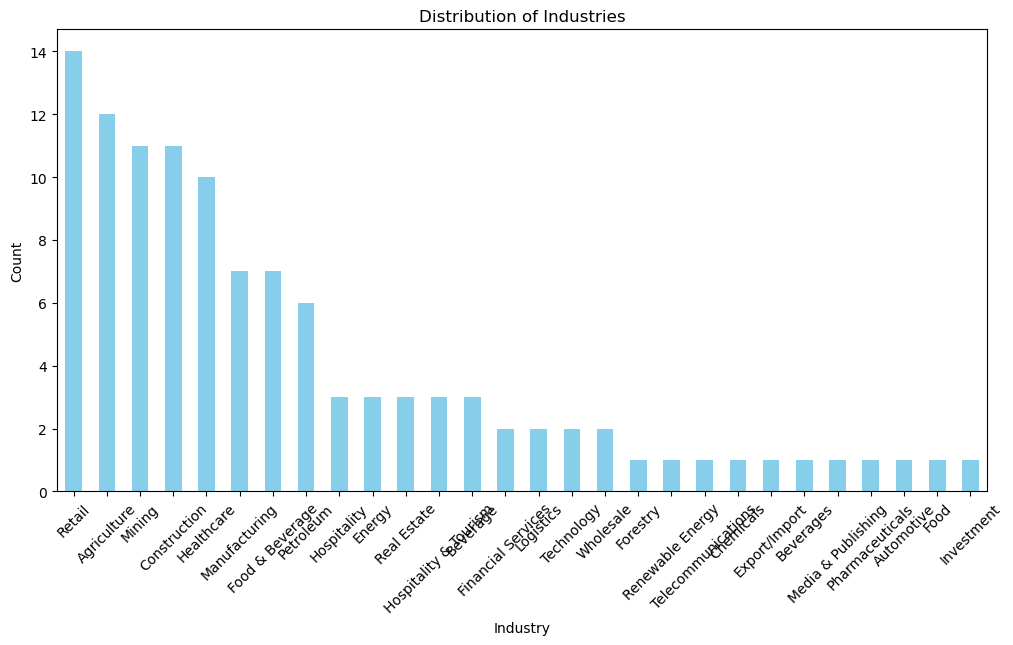

In [25]:
# Count the occurrences of each industry
industry_counts = loan_dataset_5['Industry Sector'].value_counts()

# Plot the industries
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

### populate trends 

In [60]:
populated_loan_dataset = loan_dataset_5
for industry, sentiment in industry_sentiments.items():
    # Populate the overall sentiment in the dataset for the current industry
    populated_loan_dataset.loc[populated_loan_dataset['Industry Sector'] == industry, 'Industry Trends'] = sentiment

populated_loan_dataset

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,positive,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,,1
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,,1
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,,1
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,,1


In [72]:
loan_dataset_5

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,negative,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,negative,0
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,neutral,1
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,neutral,1
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,neutral,1
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,neutral,1
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,neutral,1


In [9]:
industries

array(['Financial Services', 'Technology', 'Retail', 'Hospitality',
       'Construction', 'Telecommunications', 'Beverages', 'Agriculture',
       'Food', 'Manufacturing', 'Food & Beverage', 'Automotive',
       'Pharmaceuticals', 'Logistics', 'Mining', 'Media & Publishing',
       'Investment', 'Export/Import', 'Chemicals', 'Forestry', 'Beverage',
       'Wholesale', 'Hospitality & Tourism', 'Real Estate', 'Energy',
       'Petroleum', 'Renewable Energy', 'Healthcare'], dtype=object)

random sentiments

In [10]:
import random
import json
from loguru import logger

industry_sentiments_random = {}

for sector in industries:
    sentiment = random.choice(['positive', 'neutral', 'negative'])
    industry_sentiments_random[sector] = sentiment

logger.info(f"{json.dumps(industry_sentiments_random, indent=4)}")

2024-04-05 15:31:46.382 | INFO     | __main__:<module>:11 - {
    "Financial Services": "neutral",
    "Technology": "positive",
    "Retail": "neutral",
    "Hospitality": "negative",
    "Construction": "neutral",
    "Telecommunications": "negative",
    "Beverages": "negative",
    "Agriculture": "neutral",
    "Food": "negative",
    "Manufacturing": "negative",
    "Food & Beverage": "neutral",
    "Automotive": "negative",
    "Pharmaceuticals": "neutral",
    "Logistics": "negative",
    "Mining": "positive",
    "Media & Publishing": "neutral",
    "Investment": "neutral",
    "Export/Import": "positive",
    "Chemicals": "neutral",
    "Forestry": "neutral",
    "Beverage": "neutral",
    "Wholesale": "negative",
    "Hospitality & Tourism": "positive",
    "Real Estate": "negative",
    "Energy": "positive",
    "Petroleum": "positive",
    "Renewable Energy": "positive",
    "Healthcare": "positive"
}


In [12]:
loan_dataset_5.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,,1


#### populate trends using random trends

In [13]:
populated_loan_random_dataset = loan_dataset_5
for industry, sentiment in industry_sentiments_random.items():
    # Populate the overall sentiment in the dataset for the current industry
    populated_loan_random_dataset.loc[populated_loan_random_dataset['Industry Sector'] == industry, 'Industry Trends'] = sentiment

populated_loan_random_dataset

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,positive,1
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,positive,1
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,positive,1
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,positive,1


# Perform Decision Making on all the sectors 

- I want to use dummy data: generate dummy sentiments for all industries,
- train(develop an algorithn) to make a decision on Industry Trends.
- then I have a complete dataset to use and train 

we have 3 sentiment choices:
- positive
- neutral
- negative

generate random sentiments for test and train purposes for industry_sentiments dictionary

In [14]:
industries

array(['Financial Services', 'Technology', 'Retail', 'Hospitality',
       'Construction', 'Telecommunications', 'Beverages', 'Agriculture',
       'Food', 'Manufacturing', 'Food & Beverage', 'Automotive',
       'Pharmaceuticals', 'Logistics', 'Mining', 'Media & Publishing',
       'Investment', 'Export/Import', 'Chemicals', 'Forestry', 'Beverage',
       'Wholesale', 'Hospitality & Tourism', 'Real Estate', 'Energy',
       'Petroleum', 'Renewable Energy', 'Healthcare'], dtype=object)

`do not run the below code skip this cell`

In [22]:
import random
import json
from loguru import logger

industry_sentiments_random = {}

for sector in industries:
    sentiment = random.choice(['positive', 'neutral', 'negative'])
    industry_sentiments_random[sector] = sentiment

logger.info(f"{json.dumps(industry_sentiments_random, indent=4)}")

2024-04-05 15:21:17.704 | INFO     | __main__:<module>:11 - {
    "Financial Services": "negative",
    "Technology": "negative",
    "Retail": "positive",
    "Hospitality": "neutral",
    "Construction": "positive",
    "Telecommunications": "negative",
    "Beverages": "negative",
    "Agriculture": "neutral",
    "Food": "negative",
    "Manufacturing": "neutral",
    "Food & Beverage": "positive",
    "Automotive": "negative",
    "Pharmaceuticals": "negative",
    "Logistics": "positive",
    "Mining": "neutral",
    "Media & Publishing": "neutral",
    "Investment": "positive",
    "Export/Import": "negative",
    "Chemicals": "negative",
    "Forestry": "neutral",
    "Beverage": "positive",
    "Wholesale": "neutral",
    "Hospitality & Tourism": "positive",
    "Real Estate": "neutral",
    "Energy": "negative",
    "Petroleum": "neutral",
    "Renewable Energy": "negative",
    "Healthcare": "neutral"
}


In [15]:
populated_loan_random_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenue       112 non-null    object 
 2   Profitability          112 non-null    object 
 3   Cash Flow              112 non-null    object 
 4   Business Age           112 non-null    object 
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value       112 non-null    object 
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Industry Trends        112 non-null    object 
 14  Loan Approved          112 non-null    int64  
dtypes: flo

In [16]:
populated_loan_random_dataset.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1


### populate dataset and make approval or denials using market trends

In [17]:
decision_rules = {
    "positive": 1,
    "neutral":  1,
    "negative": 0
}

for index, row in populated_loan_random_dataset.iterrows():
    if row['Loan Approved'] == 1: 
        industry = row['Industry Sector']
        industry_sentiment = industry_sentiments_random.get(industry, 1) 
        decision = decision_rules.get(industry_sentiment, 0) 
        populated_loan_random_dataset.at[index, 'Loan Approved'] = decision 

In [18]:
populated_loan_random_dataset

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,positive,1
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,positive,1
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,positive,1
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,positive,1


In [19]:
populated_loan_random_dataset[populated_loan_random_dataset["Industry Trends"] == "negative"]

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
5,Econet Wireless,"$1,200,000",25%,"$120,000",20 years,Telecommunications,Corporation,Founder-owned,Excellent,"$2,000,000",0.3,Yes,Network expansion,negative,0
7,Delta Corporation,"$1,500,000",20%,"$150,000",40 years,Beverages,Corporation,Publicly traded,Excellent,"$3,000,000",0.5,Yes,Production expansion,negative,0
9,Innscor Africa,"$1,100,000",22%,"$110,000",30 years,Food,Corporation,Founder-owned,Excellent,"$2,500,000",0.6,Yes,Product diversification,negative,0
14,CAFCA,"$850,000",17%,"$85,000",75 years,Manufacturing,Corporation,Publicly traded,Excellent,"$1,500,000",0.4,Yes,Factory upgrade,negative,0
19,Mutare Motors,"$950,000",17%,"$95,000",8 years,Automotive,Corporation,Private,Good,"$1,500,000",0.4,Yes,Upgrade showroom and service center,negative,0
21,Gweru Global Logistics,"$1,100,000",19%,"$110,000",9 years,Logistics,Corporation,Private,Excellent,"$1,800,000",0.4,Yes,Expansion of transportation fleet,negative,0
25,Marondera Manufacturing,"$1,200,000",23%,"$120,000",11 years,Manufacturing,Corporation,Private,Excellent,"$2,000,000",0.6,Yes,Purchase of new machinery,negative,0
29,Midlands Mills,"$1,150,000",22%,"$115,000",10 years,Manufacturing,Corporation,Private,Excellent,"$1,800,000",0.6,Yes,Upgrade manufacturing equipment,negative,0
36,TSL Limited,"$1,400,000",21%,"$140,000",16 years,Logistics,Corporation,Private,Excellent,"$2,200,000",0.6,Yes,Upgrade of logistics infrastructure,negative,0


In [20]:
populated_loan_random_dataset[populated_loan_random_dataset["Loan Approved"] == 0]

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
5,Econet Wireless,"$1,200,000",25%,"$120,000",20 years,Telecommunications,Corporation,Founder-owned,Excellent,"$2,000,000",0.3,Yes,Network expansion,negative,0
7,Delta Corporation,"$1,500,000",20%,"$150,000",40 years,Beverages,Corporation,Publicly traded,Excellent,"$3,000,000",0.5,Yes,Production expansion,negative,0
9,Innscor Africa,"$1,100,000",22%,"$110,000",30 years,Food,Corporation,Founder-owned,Excellent,"$2,500,000",0.6,Yes,Product diversification,negative,0
14,CAFCA,"$850,000",17%,"$85,000",75 years,Manufacturing,Corporation,Publicly traded,Excellent,"$1,500,000",0.4,Yes,Factory upgrade,negative,0
19,Mutare Motors,"$950,000",17%,"$95,000",8 years,Automotive,Corporation,Private,Good,"$1,500,000",0.4,Yes,Upgrade showroom and service center,negative,0
21,Gweru Global Logistics,"$1,100,000",19%,"$110,000",9 years,Logistics,Corporation,Private,Excellent,"$1,800,000",0.4,Yes,Expansion of transportation fleet,negative,0
25,Marondera Manufacturing,"$1,200,000",23%,"$120,000",11 years,Manufacturing,Corporation,Private,Excellent,"$2,000,000",0.6,Yes,Purchase of new machinery,negative,0
29,Midlands Mills,"$1,150,000",22%,"$115,000",10 years,Manufacturing,Corporation,Private,Excellent,"$1,800,000",0.6,Yes,Upgrade manufacturing equipment,negative,0


In [21]:
print(
    len(populated_loan_random_dataset[populated_loan_random_dataset["Loan Approved"] == 0])
)

22


# export this new dataset for model training 

In [1]:
populated_loan_random_dataset.to_csv('modified_loan_dataset.csv', index=False)

NameError: name 'populated_loan_random_dataset' is not defined

### import modified dataset

In [4]:
modified_loan_dataset = pd.read_csv("modified_loan_dataset.csv")

In [5]:
modified_loan_dataset.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1


In [6]:
# import seaborn as sns

# we want plots to appear inside the notebook
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# 2. Exploratoy Data Analysis (EDA)

The goal is to get insight on the data and will try to get more view about the dataset


In [7]:
modified_loan_dataset["Loan Approved"].value_counts()

Loan Approved
1    90
0    22
Name: count, dtype: int64

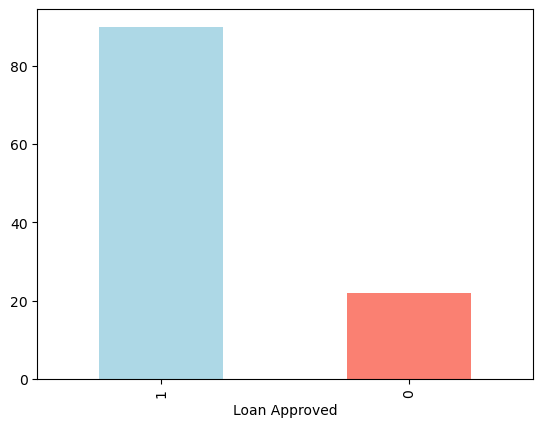

In [9]:
# plot graph of our target column
modified_loan_dataset["Loan Approved"].value_counts()\
                    .plot(
                        kind="bar",
                        color=["lightblue","salmon"]
                    );

In [10]:
# check for missing values
modified_loan_dataset.isna().sum()

Company Name             0
Business Revenue         0
Profitability            0
Cash Flow                0
Business Age             0
Industry Sector          0
Business Structure       0
Ownership Structure      0
Credit History           0
Collateral Value         0
Debt-to-Equity Ratio     0
Regulatory Compliance    0
Use of Funds             0
Industry Trends          0
Loan Approved            0
dtype: int64

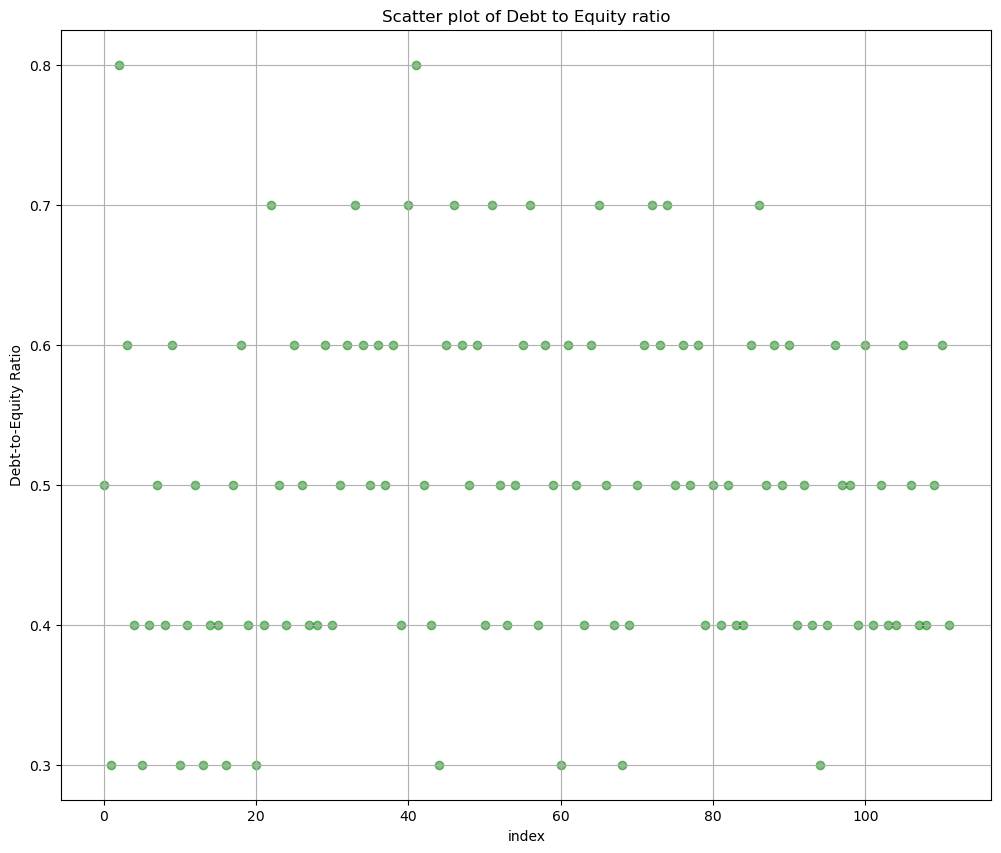

In [17]:
# Plot debt to equity ratio plot
debt_to_equity_ratio_column = modified_loan_dataset["Debt-to-Equity Ratio"]

plt.figure(figsize=(12, 10))
plt.scatter(range(len(debt_to_equity_ratio_column)), debt_to_equity_ratio_column, color='green', alpha=0.5)
plt.title("Scatter plot of Debt to Equity ratio")
plt.xlabel("index")
plt.ylabel("Debt-to-Equity Ratio")
plt.grid(True)
plt.show();

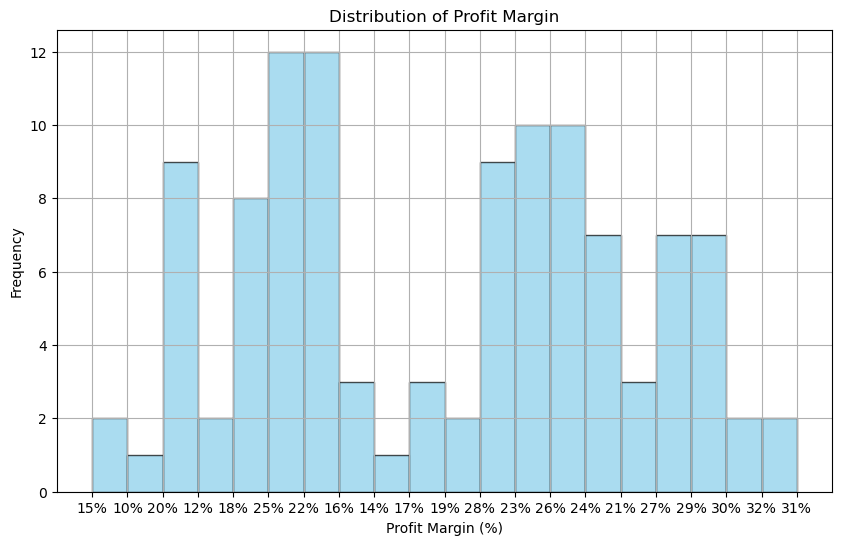

In [23]:
# plot profitability of the campanies
# Each bar represents a range of profit margin values, 
# and the height of the bar indicates the frequency of companies within that range.
profit_margin_column = modified_loan_dataset["Profitability"]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(profit_margin_column, bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Profit Margin")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

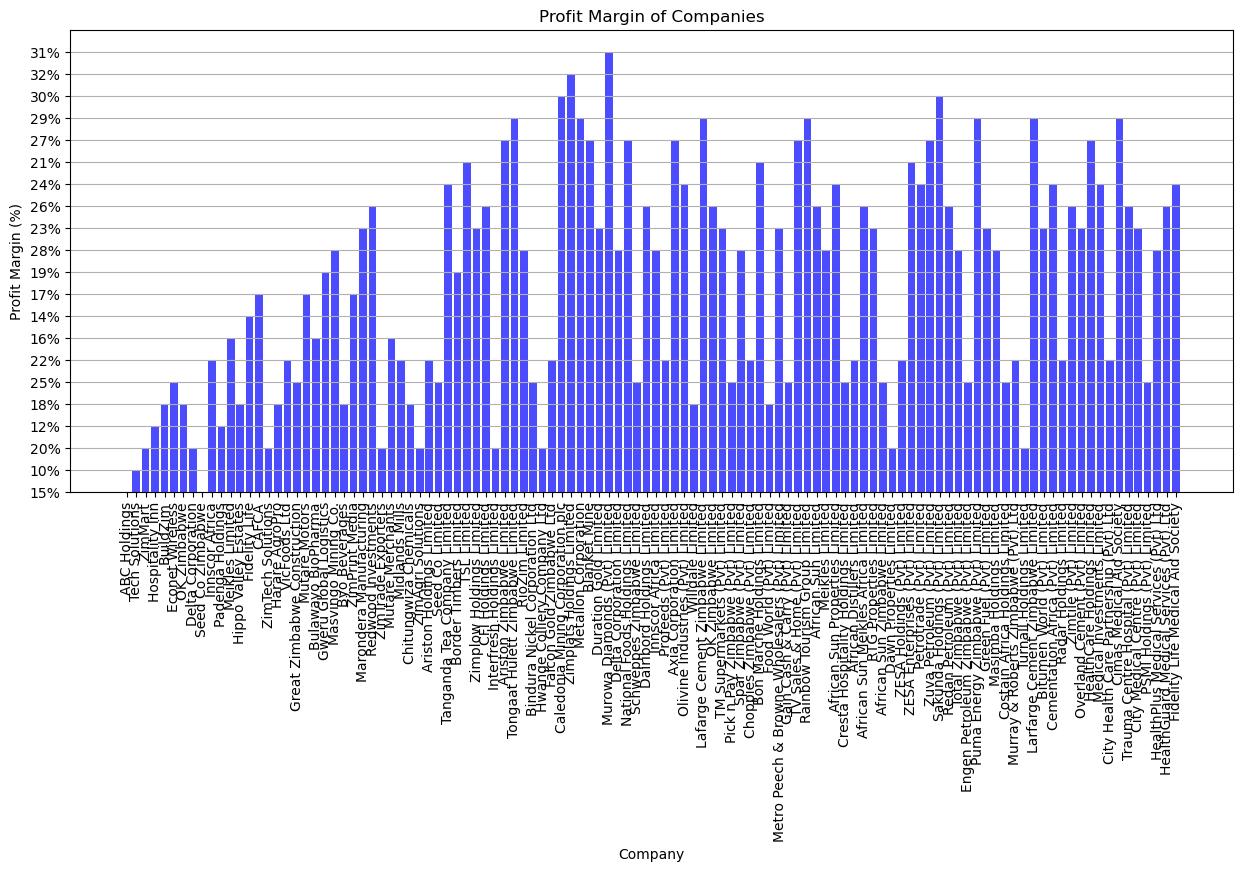

In [24]:
# plot of the bar chart
plt.figure(figsize=(15, 6))
plt.bar(range(len(profit_margin_column)), profit_margin_column, color='blue', alpha=0.7)
plt.title('Profit Margin of Companies')
plt.xlabel('Company')
plt.ylabel('Profit Margin (%)')
plt.xticks(range(len(profit_margin_column)), modified_loan_dataset['Company Name'], rotation=90)
plt.grid(axis='y')
plt.show()

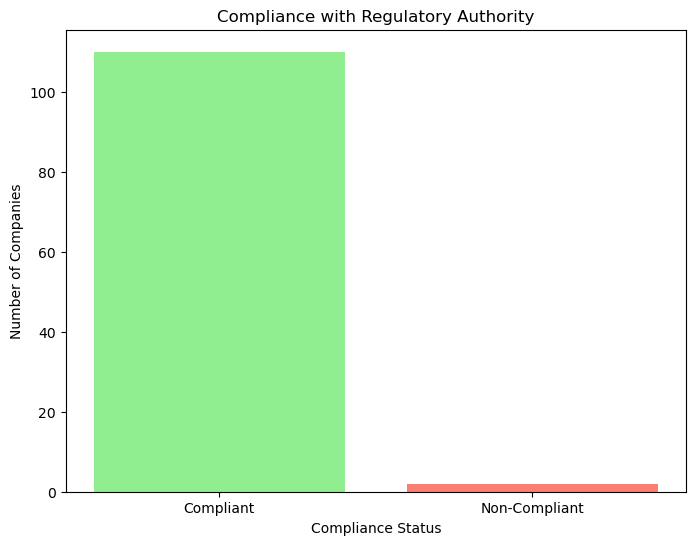

In [29]:
# Count the number of compliant and non-compliant companies
compliant_count = modified_loan_dataset[modified_loan_dataset['Regulatory Compliance'] == 'Yes'].shape[0]
non_compliant_count = modified_loan_dataset[modified_loan_dataset['Regulatory Compliance'] == 'No'].shape[0]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(['Compliant', 'Non-Compliant'], [compliant_count, non_compliant_count], color=['lightgreen', 'salmon'])
plt.title('Compliance with Regulatory Authority')
plt.xlabel('Compliance Status')
plt.ylabel('Number of Companies')
plt.show()

# 3. Modelling 

In [30]:
modified_loan_dataset.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends,Loan Approved
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral,1
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive,0
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral,1
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative,0
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral,1


In [31]:
df = modified_loan_dataset

In [32]:
# Split the data into X and y
X = df.drop("Loan Approved", axis=1)
y = df["Loan Approved"]

In [33]:
X.head()

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral


In [34]:
y

0      1
1      0
2      1
3      0
4      1
      ..
107    1
108    1
109    1
110    1
111    1
Name: Loan Approved, Length: 112, dtype: int64

In [38]:
X.shape

(112, 14)

In [39]:
X

,Company Name,Business Revenue,Profitability,Cash Flow,Business Age,Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value,Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,positive
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,positive
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,positive
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,positive


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenue       112 non-null    object 
 2   Profitability          112 non-null    object 
 3   Cash Flow              112 non-null    object 
 4   Business Age           112 non-null    object 
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value       112 non-null    object 
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Industry Trends        112 non-null    object 
dtypes: float64(1), object(13)
memory usage: 12.4+ KB


In [42]:
# rename cols
cols = {"Business Revenue":"Business Revenie ($)",
        "Profitability":"Profitability (%)",
        "Cash Flow":"Cash Flow ($)",
        "Business Age":"Business Age (Yrs)",
        "Collateral Value":"Collateral Value ($)"
       }
X.rename(columns=cols, inplace=True)
X

,Company Name,Business Revenie ($),Profitability (%),Cash Flow ($),Business Age (Yrs),Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value ($),Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,"$500,000",15%,"$50,000",10 years,Financial Services,Corporation,Founder-owned,Good,"$750,000",0.5,Yes,Expand operations,neutral
1,Tech Solutions,"$300,000",10%,"$30,000",5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,"$400,000",0.3,No,Software development,positive
2,ZimMart,"$700,000",20%,"$70,000",15 years,Retail,Sole Proprietorship,Family-owned,Excellent,"$900,000",0.8,Yes,Store expansion,neutral
3,Hospitality Inn,"$400,000",12%,"$40,000",7 years,Hospitality,Partnership,Multiple partners,Moderate,"$600,000",0.6,No,Renovation & expansion,negative
4,BuildZim,"$600,000",18%,"$60,000",12 years,Construction,Corporation,Investor-owned,Strong,"$1,000,000",0.4,Yes,Equipment upgrade,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,"$1,700,000",23%,"$170,000",17 years,Healthcare,Corporation,Private,Good,"$2,500,000",0.4,Yes,Modernization of medical services,positive
108,PSMI Holdings (Pvt) Limited,"$1,600,000",25%,"$160,000",16 years,Healthcare,Corporation,Private,Good,"$2,400,000",0.4,Yes,Expansion of healthcare network,positive
109,HealthPlus Medical Services (Pvt) Ltd,"$2,300,000",28%,"$230,000",21 years,Healthcare,Corporation,Private,Excellent,"$3,500,000",0.5,Yes,Investment in advanced medical technology,positive
110,HealthGuard Medical Services (Pvt) Ltd,"$2,100,000",26%,"$210,000",20 years,Healthcare,Corporation,Private,Excellent,"$3,200,000",0.6,Yes,Expansion of healthcare services,positive


In [43]:
# financial cols
financial_cols = [
    "Business Revenie ($)", 
    "Cash Flow ($)",
    "Collateral Value ($)"
]

# age col
age_cols = ["Business Age (Yrs)"]

# percentage cols
percentage_cols = ["Profitability (%)"]

## for now i will use experiment dataframe to perform conversions

In [44]:
# turn financial cols to numbers
experiment_df = X

# Convert the specified columns to integers
experiment_df[financial_cols] = experiment_df[financial_cols].replace('[$,]', '', regex=True).astype(int)
experiment_df.head()

,Company Name,Business Revenie ($),Profitability (%),Cash Flow ($),Business Age (Yrs),Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value ($),Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,500000,15%,50000,10 years,Financial Services,Corporation,Founder-owned,Good,750000,0.5,Yes,Expand operations,neutral
1,Tech Solutions,300000,10%,30000,5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,400000,0.3,No,Software development,positive
2,ZimMart,700000,20%,70000,15 years,Retail,Sole Proprietorship,Family-owned,Excellent,900000,0.8,Yes,Store expansion,neutral
3,Hospitality Inn,400000,12%,40000,7 years,Hospitality,Partnership,Multiple partners,Moderate,600000,0.6,No,Renovation & expansion,negative
4,BuildZim,600000,18%,60000,12 years,Construction,Corporation,Investor-owned,Strong,1000000,0.4,Yes,Equipment upgrade,neutral


In [45]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenie ($)   112 non-null    int32  
 2   Profitability (%)      112 non-null    object 
 3   Cash Flow ($)          112 non-null    int32  
 4   Business Age (Yrs)     112 non-null    object 
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value ($)   112 non-null    int32  
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Industry Trends        112 non-null    object 
dtypes: float64(1), int32(3), object(10)
memory usage: 11.1+ KB

In [46]:
# convert Profitability
experiment_df['Profitability (%)'] = experiment_df['Profitability (%)'].str.replace('%', '').astype(float)
experiment_df

,Company Name,Business Revenie ($),Profitability (%),Cash Flow ($),Business Age (Yrs),Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value ($),Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,500000,15.0,50000,10 years,Financial Services,Corporation,Founder-owned,Good,750000,0.5,Yes,Expand operations,neutral
1,Tech Solutions,300000,10.0,30000,5 years,Technology,Limited Liability Company,Co-founder partnership,Limited,400000,0.3,No,Software development,positive
2,ZimMart,700000,20.0,70000,15 years,Retail,Sole Proprietorship,Family-owned,Excellent,900000,0.8,Yes,Store expansion,neutral
3,Hospitality Inn,400000,12.0,40000,7 years,Hospitality,Partnership,Multiple partners,Moderate,600000,0.6,No,Renovation & expansion,negative
4,BuildZim,600000,18.0,60000,12 years,Construction,Corporation,Investor-owned,Strong,1000000,0.4,Yes,Equipment upgrade,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,1700000,23.0,170000,17 years,Healthcare,Corporation,Private,Good,2500000,0.4,Yes,Modernization of medical services,positive
108,PSMI Holdings (Pvt) Limited,1600000,25.0,160000,16 years,Healthcare,Corporation,Private,Good,2400000,0.4,Yes,Expansion of healthcare network,positive
109,HealthPlus Medical Services (Pvt) Ltd,2300000,28.0,230000,21 years,Healthcare,Corporation,Private,Excellent,3500000,0.5,Yes,Investment in advanced medical technology,positive
110,HealthGuard Medical Services (Pvt) Ltd,2100000,26.0,210000,20 years,Healthcare,Corporation,Private,Excellent,3200000,0.6,Yes,Expansion of healthcare services,positive


In [47]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenie ($)   112 non-null    int32  
 2   Profitability (%)      112 non-null    float64
 3   Cash Flow ($)          112 non-null    int32  
 4   Business Age (Yrs)     112 non-null    object 
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value ($)   112 non-null    int32  
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Industry Trends        112 non-null    object 
dtypes: float64(2), int32(3), object(9)
memory usage: 11.1+ KB


In [48]:
# convert Business Age
experiment_df['Business Age (Yrs)'] = experiment_df['Business Age (Yrs)'].\
                                        str.extract('(\d+)').astype(int)
experiment_df

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_8004\1776677195.py:3: SyntaxWarning: invalid escape sequence '\d'
  str.extract('(\d+)').astype(int)


,Company Name,Business Revenie ($),Profitability (%),Cash Flow ($),Business Age (Yrs),Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value ($),Debt-to-Equity Ratio,Regulatory Compliance,Use of Funds,Industry Trends
0,ABC Holdings,500000,15.0,50000,10,Financial Services,Corporation,Founder-owned,Good,750000,0.5,Yes,Expand operations,neutral
1,Tech Solutions,300000,10.0,30000,5,Technology,Limited Liability Company,Co-founder partnership,Limited,400000,0.3,No,Software development,positive
2,ZimMart,700000,20.0,70000,15,Retail,Sole Proprietorship,Family-owned,Excellent,900000,0.8,Yes,Store expansion,neutral
3,Hospitality Inn,400000,12.0,40000,7,Hospitality,Partnership,Multiple partners,Moderate,600000,0.6,No,Renovation & expansion,negative
4,BuildZim,600000,18.0,60000,12,Construction,Corporation,Investor-owned,Strong,1000000,0.4,Yes,Equipment upgrade,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,1700000,23.0,170000,17,Healthcare,Corporation,Private,Good,2500000,0.4,Yes,Modernization of medical services,positive
108,PSMI Holdings (Pvt) Limited,1600000,25.0,160000,16,Healthcare,Corporation,Private,Good,2400000,0.4,Yes,Expansion of healthcare network,positive
109,HealthPlus Medical Services (Pvt) Ltd,2300000,28.0,230000,21,Healthcare,Corporation,Private,Excellent,3500000,0.5,Yes,Investment in advanced medical technology,positive
110,HealthGuard Medical Services (Pvt) Ltd,2100000,26.0,210000,20,Healthcare,Corporation,Private,Excellent,3200000,0.6,Yes,Expansion of healthcare services,positive


In [49]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenie ($)   112 non-null    int32  
 2   Profitability (%)      112 non-null    float64
 3   Cash Flow ($)          112 non-null    int32  
 4   Business Age (Yrs)     112 non-null    int32  
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value ($)   112 non-null    int32  
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Use of Funds           112 non-null    object 
 13  Industry Trends        112 non-null    object 
dtypes: float64(2), int32(4), object(8)
memory usage: 10.6+ KB


### drop 'Use of funds' col for now

In [51]:
# drop the 'Use of funds' column
experiment_df.drop(columns=['Use of Funds'], inplace=True)
experiment_df.head()

,Company Name,Business Revenie ($),Profitability (%),Cash Flow ($),Business Age (Yrs),Industry Sector,Business Structure,Ownership Structure,Credit History,Collateral Value ($),Debt-to-Equity Ratio,Regulatory Compliance,Industry Trends
0,ABC Holdings,500000,15.0,50000,10,Financial Services,Corporation,Founder-owned,Good,750000,0.5,Yes,neutral
1,Tech Solutions,300000,10.0,30000,5,Technology,Limited Liability Company,Co-founder partnership,Limited,400000,0.3,No,positive
2,ZimMart,700000,20.0,70000,15,Retail,Sole Proprietorship,Family-owned,Excellent,900000,0.8,Yes,neutral
3,Hospitality Inn,400000,12.0,40000,7,Hospitality,Partnership,Multiple partners,Moderate,600000,0.6,No,negative
4,BuildZim,600000,18.0,60000,12,Construction,Corporation,Investor-owned,Strong,1000000,0.4,Yes,neutral


In [52]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           112 non-null    object 
 1   Business Revenie ($)   112 non-null    int32  
 2   Profitability (%)      112 non-null    float64
 3   Cash Flow ($)          112 non-null    int32  
 4   Business Age (Yrs)     112 non-null    int32  
 5   Industry Sector        112 non-null    object 
 6   Business Structure     112 non-null    object 
 7   Ownership Structure    112 non-null    object 
 8   Credit History         112 non-null    object 
 9   Collateral Value ($)   112 non-null    int32  
 10  Debt-to-Equity Ratio   112 non-null    float64
 11  Regulatory Compliance  112 non-null    object 
 12  Industry Trends        112 non-null    object 
dtypes: float64(2), int32(4), object(7)
memory usage: 9.8+ KB


## Transform non numeric data to numeric by categorizing using OneHotEncoder

In [53]:
non_numeric_columns = experiment_df.select_dtypes(exclude=['number'])
non_numeric_columns

,Company Name,Industry Sector,Business Structure,Ownership Structure,Credit History,Regulatory Compliance,Industry Trends
0,ABC Holdings,Financial Services,Corporation,Founder-owned,Good,Yes,neutral
1,Tech Solutions,Technology,Limited Liability Company,Co-founder partnership,Limited,No,positive
2,ZimMart,Retail,Sole Proprietorship,Family-owned,Excellent,Yes,neutral
3,Hospitality Inn,Hospitality,Partnership,Multiple partners,Moderate,No,negative
4,BuildZim,Construction,Corporation,Investor-owned,Strong,Yes,neutral
...,...,...,...,...,...,...,...
107,City Medical Centre (Pvt) Limited,Healthcare,Corporation,Private,Good,Yes,positive
108,PSMI Holdings (Pvt) Limited,Healthcare,Corporation,Private,Good,Yes,positive
109,HealthPlus Medical Services (Pvt) Ltd,Healthcare,Corporation,Private,Excellent,Yes,positive
110,HealthGuard Medical Services (Pvt) Ltd,Healthcare,Corporation,Private,Excellent,Yes,positive


In [54]:
features = non_numeric_columns.columns.to_numpy()
features

array(['Company Name', 'Industry Sector', 'Business Structure',
       'Ownership Structure', 'Credit History', 'Regulatory Compliance',
       'Industry Trends'], dtype=object)

In [55]:
# transform experiminted dataframe
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_df = transformer.fit_transform(experiment_df)
transformed_df

<112x169 sparse matrix of type '<class 'numpy.float64'>'
	with 1456 stored elements in Compressed Sparse Row format>

In [57]:
# split to train and test 
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2)

# Training 


- Training will be done on the training set
- Testing will be on the test set

Priority is on the Random Forest Classifier Model, might use other models as well

In [58]:
# Fit and Score using the Random Forest Classifier

# set random seed
np.random.seed(42)

# initialize model
rf_classifier = RandomForestClassifier()

# fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# check model score
rf_classifier.score(X_test, y_test)

1.0

In [60]:
transformed_df.shape

(112, 169)